In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from open4dense import give_me_orig_ecco
import xarray as xr
import os 
import ecco_v4_py as e4p

int_arg = 0

filedb_lst = []
for i in range(1,13):
    for j in range(1,4):
        filedb_lst.append(f'/sciserver/filedb{i:02}-0{j}')

save_path = filedb_lst[9+int_arg]+'/ocean/wenrui_temp/particle_file/NEP/nc_backward_seas/'
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'

ds = give_me_orig_ecco()
ds['utrans'] = (ds['u_gm']+ds['UVELMASS'])*ds.dyG*ds.drF
ds['vtrans'] = (ds['v_gm']+ds['VVELMASS'])*ds.dxG*ds.drF
ds['wtrans'] = (ds['w_gm']+ds['WVELMASS'])*ds.rA
tseas1 = xr.open_zarr(path+'tseas1.zarr')
tseas2 = xr.open_zarr(path+'tseas2.zarr')
tseas3 = xr.open_zarr(path+'tseas3.zarr')
tseas = xr.concat([tseas1,tseas2,tseas3],dim = 'dayofyear')
ta = (ds.THETA.groupby('time.dayofyear') - tseas).transpose('time','Z','face','Y','X').THETA

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]


In [2]:
from cmocean.cm import balance
import cartopy.crs as ccrs
import cartopy.feature as cfeature
projection = ccrs.Mercator(central_longitude=190.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=45.0)

In [3]:
from open4dense import give_me_ecco_heat_seas

In [4]:
from dask.diagnostics import ProgressBar

In [5]:
rhoconst = 1029
c_p = 3994

In [6]:
wallt_path = '/sciserver/filedb09-01/ocean/wall_theta.zarr'
data_path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
ds1 = give_me_ecco_heat_seas(data_path,wallt_path,time_mean_vel = False)
# tp = sd.Topology(ds)

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an

In [7]:
ds = xr.merge([ds,ds1])

In [8]:
ds

<xarray.Dataset>
Dimensions:     (time: 9497, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 9496, dayofyear: 366)
Coordinates: (12/33)
    XC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    XG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-01T18:00:00 ... 2017-12-31T06:0...
  * time_midp   (time_midp) datetime64[ns] 1992-01-02 1992-01-03 ... 2017-12-31
    ...          ...
    maskW       (Z, face, Y, Xp1) int8 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    rA          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * dayofyear   (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Data variables: (12/68)
    ADVr_SLT    (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    I           (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    lhs         (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    txprime     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    typrime     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    tzprime     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    divuty      (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1992-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Da...
    uuid:                            c2efe382-4168-11eb-8956-0cc47a3f480f

In [9]:
xg = np.load('../../james_plot/plotting_xg.npy')
yg = np.load('../../james_plot/plotting_yg.npy')

In [10]:
mm = 1/25.4

In [11]:
# period_mean = ds['A'][7944:8674,:5].mean(dim = ('Z','time')).persist()

In [12]:
# vmax = 1.5e-7
# fig = plt.figure(figsize = (180*mm,130*mm))
# ax = plt.axes(projection = projection)
# it = 7915+800
# print(ds.time[it].values)
# to_plot = period_mean
# for ii in [7,8,10,11]:
#     p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,to_plot[ii] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree(),linewidth=0,rasterized=True)
# ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
# ax.plot([-158,-158],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
# ax.plot([-138,-138],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
# ax.plot([-158,-138],[32,32],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
# ax.plot([-158,-138],[45,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
# ax.set_extent([145,250,20,60])
# plt.colorbar(p2,extend = 'both')
# plt.savefig('eulerian_map.png')

In [13]:
rerun_A_ts = False

In [14]:
if rerun_A_ts:
    xbool = np.logical_and(ds.XC>-158,ds.XC<-138)
    ybool = np.logical_and(ds.YC>32,ds.YC<45)
    zbool = ds.Z>-150
    zbool50 = ds.Z>-50
    pos_bool = np.logical_and(np.logical_and(xbool,ybool),zbool).transpose('Z','face','Y','X')
    bool50 = np.logical_and(np.logical_and(xbool,ybool),zbool50).transpose('Z','face','Y','X')
    bool20 = np.logical_and(np.logical_and(xbool,ybool),ds.Z>-20).transpose('Z','face','Y','X')
    
    vol = (ds.rA*ds.drF*ds.HFacC).transpose('Z','face','Y','X').persist()
    pos_vol = pos_bool*vol
    vol50 = vol*bool50
    vol20 = vol*bool20
    
    box_a50 = (ds['A']*vol50)
    
    cumu_a50 = (box_a50.sum(dim = ('Z','face','Y','X'))).persist()
    np.save('upgradtbar_int_timeserie50.npy',np.array(cumu_a50))
else:
    ds['cumu_a50'] = xr.DataArray(np.load('upgradtbar_int_timeserie50.npy')*rhoconst*c_p/1e14,dims = 'time')
    cumu_a50 = ds['cumu_a50']

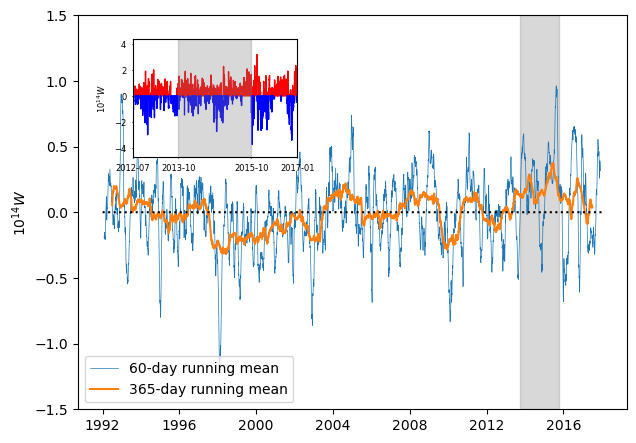

In [15]:
plt.figure(figsize = (180*mm,130*mm))
plt.plot(ds.time,cumu_a50.rolling(time = 60,center = True).mean(),lw = 0.5,label = '60-day running mean')
plt.plot(ds.time,cumu_a50.rolling(time = 365,center = True).mean(),label = '365-day running mean')
plt.plot(ds.time, np.zeros_like(ds.time,float),':',color = 'k')
plt.legend(loc = 'lower left')
plt.axvspan(np.datetime64('2013-10-01'),np.datetime64('2015-10-01'),alpha = 0.3,color = 'grey')
plt.ylim(-1.5,1.5)
plt.ylabel(r'$10^{14} W$')

ins = plt.gca().inset_axes([0.1,0.64,0.3,0.3])
ins.tick_params(length = 1,labelsize = 6)
ins.fill_between(ds.time,cumu_a50,where = cumu_a50>0,color = 'red')
ins.fill_between(ds.time,cumu_a50,where = cumu_a50<0,color = 'blue')
ins.axvspan(np.datetime64('2013-10-01'),np.datetime64('2015-10-01'),alpha = 0.3,color = 'grey')
ins.set_xlim(np.datetime64('2012-07'),np.datetime64('2017-01'))
ins.set_ylabel(r'$10^{14} W$',fontsize =6)
ins.set_xticks([np.datetime64('2012-07'),np.datetime64('2013-10'),np.datetime64('2015-10'),np.datetime64('2017-01')],['2012-07','2013-10','2015-10','2017-01'])
plt.savefig('sup_anomaly_timeseries.pdf',dpi = 300)

In [16]:
# vmax = 1.5e-6
# ax = plt.axes(projection = projection)
# it = 7915+12
# print(ds.time[it].values)
# to_plot = pos_bool[0]
# for ii in [7,8,10,11]:
#     p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,to_plot[ii] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree(),linewidth=0,rasterized=True)
# ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
# ax.set_extent([145,250,20,60])

# box_a = (ds['A']*pos_vol)

# box_a20 = (ds['A']*vol50)

# cumu_a20 = (box_a20.sum(dim = ('Z','face','Y','X'))).persist()
# np.save('upgradtbar_int_timeserie20.npy',np.array(cumu_a50))

# cumu_a = (box_a.sum(dim = ('Z','face','Y','X'))).persist()
# np.save('upgradtbar_int_timeserie.npy',np.array(cumu_a))

# plt.plot(ds.time,cumu_a50,lw = 1)
# plt.axvspan(*[np.datetime64(f'{i}-01-01') for i in [2014,2016]],alpha = 0.3)
# # plt.fill_betweenx([-1e8,1e8],[np.datetime64(f'{i}-01-01') for i in [2014,2014]],[np.datetime64(f'{i}-01-01') for i in [2014,2014]])
# # plt.show()
# plt.xlim(np.datetime64('2013-06'),np.datetime64('2016-06'))
# # plt.plot([np.datetime64(f'{i}-01-01') for i in [2014,2016]],[-1e8,1e8])

# # plt.plot(ds.time,cumu_a50.rolling(time = 30,center = True).mean())
# plt.plot(ds.time,cumu_a50.rolling(time = 90,center = True).mean())
# plt.axvspan(np.datetime64('2013-09-01'),np.datetime64('2016-03-01'),alpha = 0.3)
# # plt.xlim(np.datetime64('2010-01'),np.datetime64('2018-01'))

# # plt.plot(ds.time,cumu_a50.rolling(time = 30,center = True).mean())
# plt.fill_between(ds.time,cumu_a50,where = cumu_a50>0,color = 'red')
# plt.fill_between(ds.time,cumu_a50,where = cumu_a50<0,color = 'blue')
# plt.axvspan(np.datetime64('2013-10-01'),np.datetime64('2015-10-01'),alpha = 0.3,color = 'grey')
# plt.xlim(np.datetime64('2012-07'),np.datetime64('2017-01'))
# # plt.xlim(np.datetime64('2010-01'),np.datetime64('2018-01'))

# plt.plot(ds.time,cumu_a20.rolling(time = 30,center = True).mean())
# plt.plot(ds.time,cumu_a20.rolling(time = 365,center = True).mean())
# plt.axvspan(np.datetime64('2013-09-01'),np.datetime64('2016-03-01'),alpha = 0.3)

# np.mean(cumu_a).values

# 1